In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in
# predicting the quality of wine.

<AxesSubplot: >

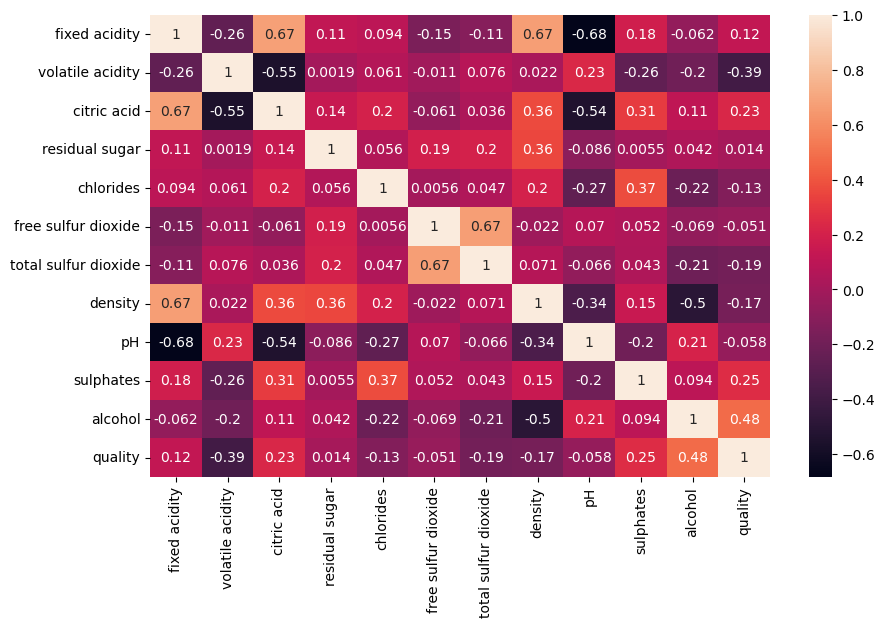

In [4]:
df=pd.read_csv('winequality-red.csv',delimiter=',')
plt.figure(figsize=(10,6))

sns.heatmap(df.corr(),annot=True)

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


as per the corelation chart, we can see sulphates,alcohol,citric acid as highly corelated to quality of a wine.
volatile acidity,chlorides,total sulfur dioxide,density are negatively corelated 

and as residual sugar,free sulfur dioxide are not closely related to quality of wine we can drop these features.

In [6]:
# Q2. How did you handle missing data in the wine quality data set during the feature engineering process?
# Discuss the advantages and disadvantages of different imputation techniques.

1. Remove duplicate recordes
2. finding null values in columns.
3. replacing null values with Mean/median or mode.
4. checking spread of data in qualiy column
5. doing upsampling / downsampling


In [8]:
# Q3. What are the key factors that affect students' performance in exams? How would you go about
# analyzing these factors using statistical techniques?

as seen from corelation chart Math_score, reading_score and writing score have strong corelation with total score.
and when Gender=Female , tends to perform better then male
from hist plot when childern have standard lunch they tend to perform better.
parent level of eduction also have impact on student score

In [9]:
# Q4. Describe the process of feature engineering in the context of the student performance data set. How
# did you select and transform the variables for your model?

gender,Lunch and test_preparation_course can be converted to 1 & 0
race_ethnicity,parental_level_of_education  we can use one hot encodeing


In [10]:
# Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution
# of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to
# these features to improve normality?

In [11]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
df.shape

(1599, 12)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [19]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

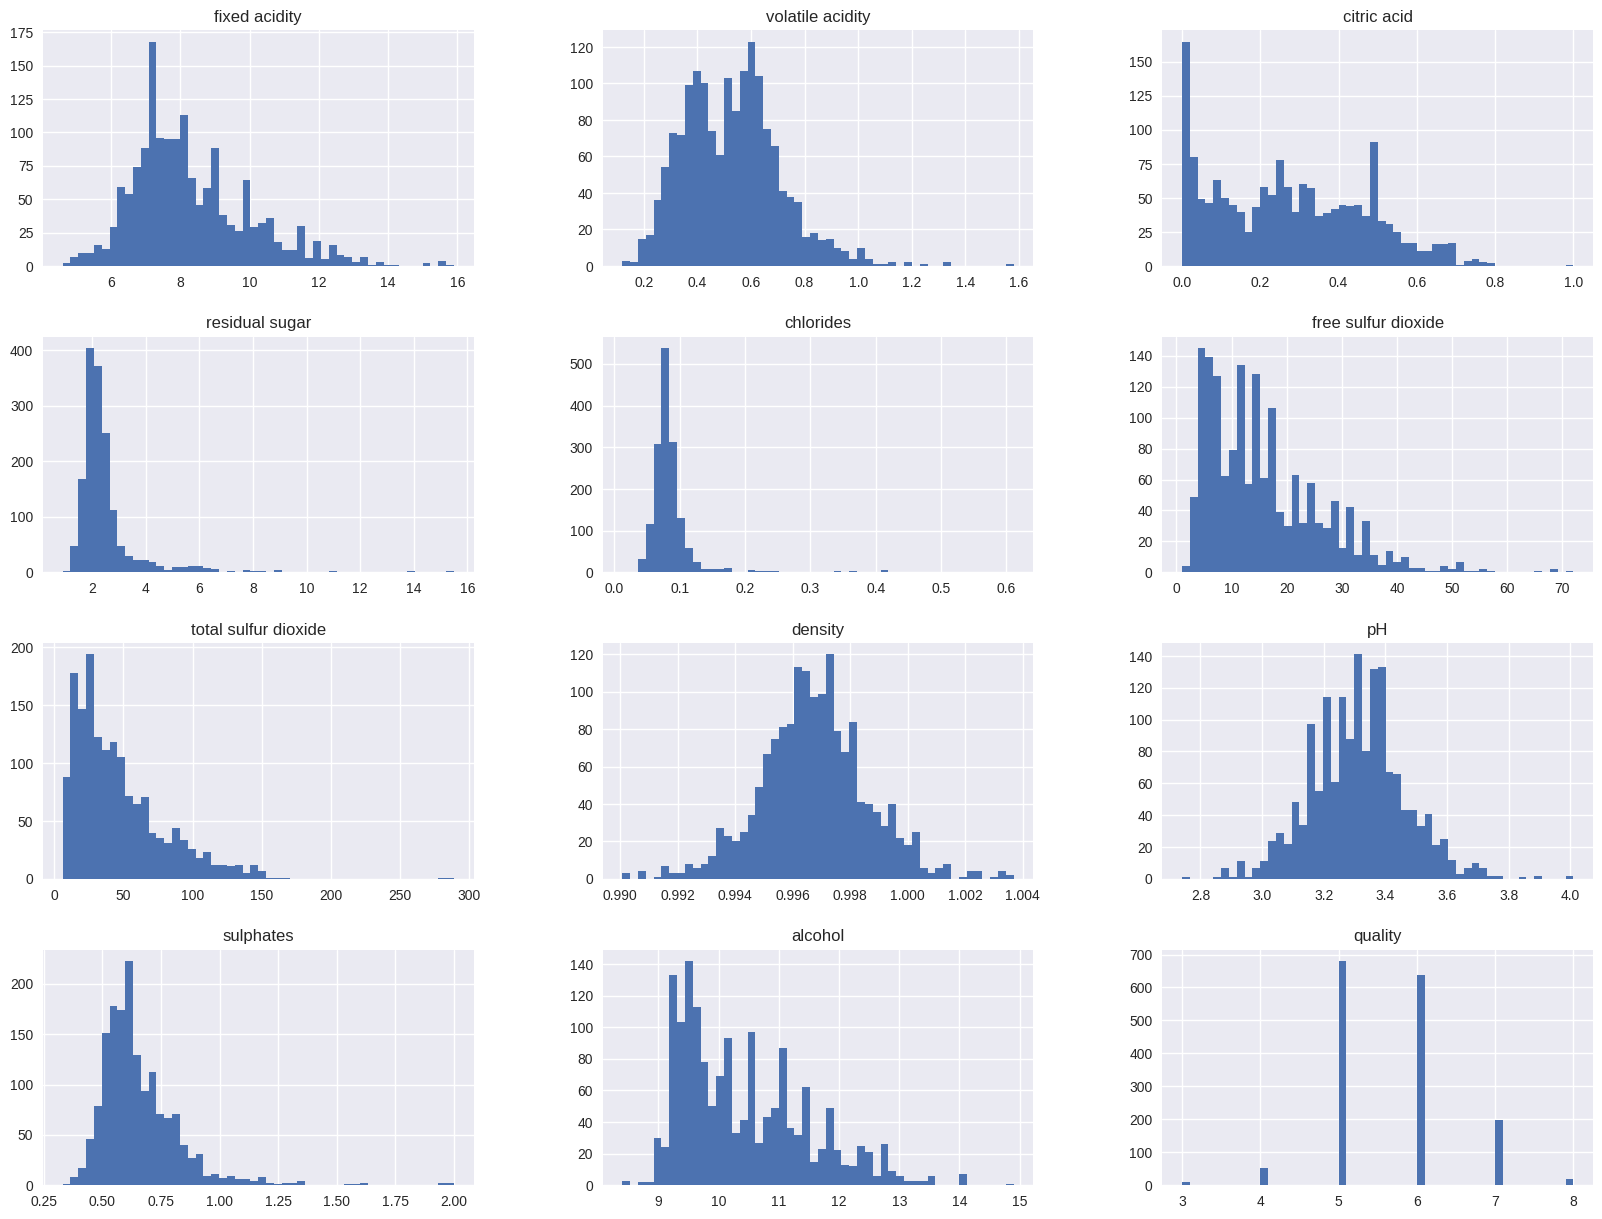

In [12]:
plt.style.use('seaborn')
df.hist(bins=50,figsize=(20,15))
plt.show()

<AxesSubplot: >

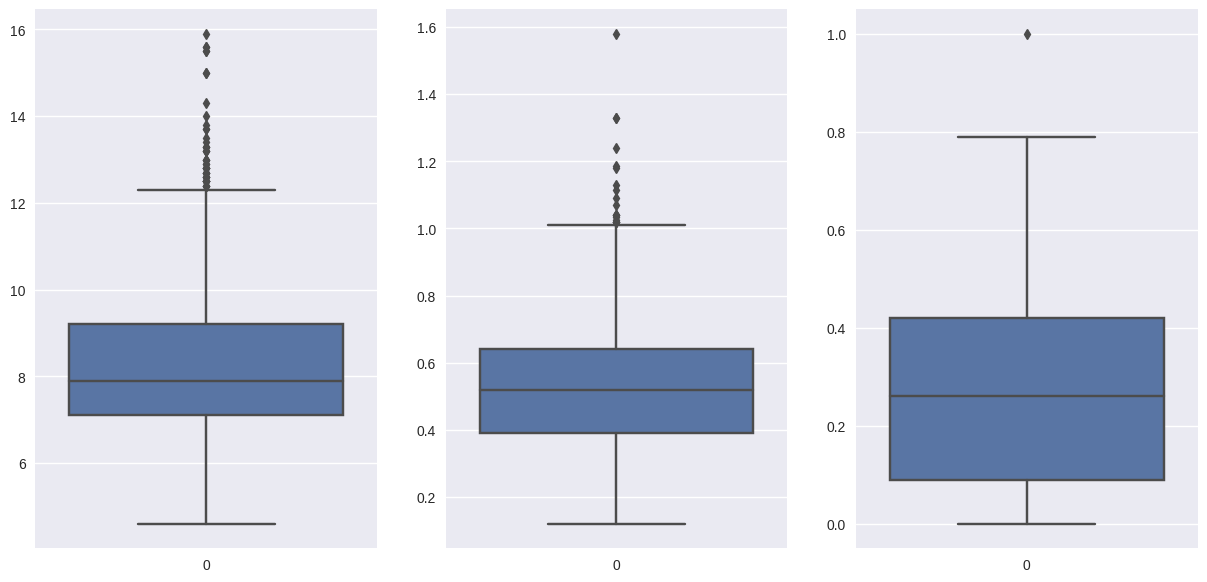

In [21]:
fig_axis=plt.subplots(1,4,figsize=(15,7))
plt.subplot(131)
sns.boxplot(df['fixed acidity'])
plt.subplot(132)
sns.boxplot(df['volatile acidity'])
plt.subplot(133)
sns.boxplot(df['citric acid'])

<AxesSubplot: >

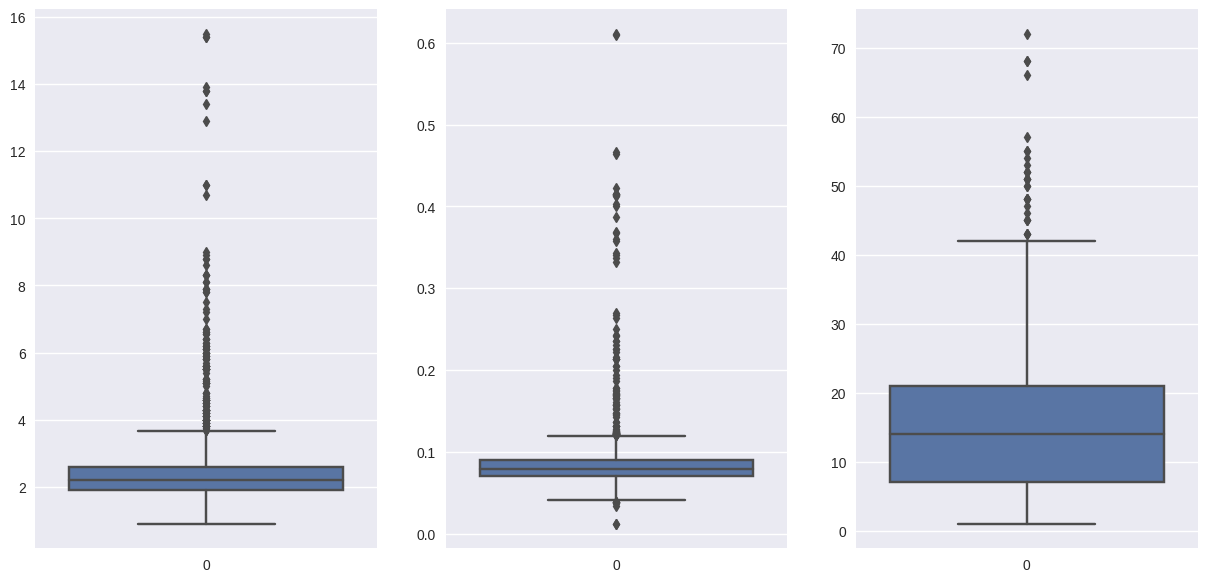

In [22]:
fig_axis=plt.subplots(1,4,figsize=(15,7))
plt.subplot(131)
sns.boxplot(df['residual sugar'])
plt.subplot(132)
sns.boxplot(df['chlorides'])
plt.subplot(133)
sns.boxplot(df['free sulfur dioxide'])

as we can check in each column we have outliers , so make them normaly distributed we have to treat outliers

In [24]:
# Q6

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Load the wine quality dataset

# Separate the target variable (quality) from the features
X = df.drop("quality", axis=1)

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the minimum number of components required for 90% variance explained
n_components = np.argmax(cumulative_variance_ratio >= 0.90) + 1

print(f"Minimum number of components to explain 90% variance: {n_components}")


Minimum number of components to explain 90% variance: 7
